# Определение перспективного тарифа для телеком-компании

Чтобы скорректировать рекламный бюджет, коммерческому департаменту компании "Мегалайн" необходимо понять, какой тариф приносит больше денег. Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. На основании данных о клиентах (регион, тариф, количесвтво звонков и сообщений) за 2018 год необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования:**

 1. определить поведение клиентов оператора (уровни потребления минут разговора, сообщений, объёма интернет-трафика);
 2. проверить гипотезы:
  1. средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются;
  2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
**Ход исследования**

Входные данные - информация о пятистах пользователях: регион, тариф, сколько звонков, сообщений и интернет-трафика использовали за 2018 год. Информации о качестве данных нет, поэтому перед основным исследованием будет проведён обзор данных, а также их предобработка.

## Обзор данных

In [4]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### Информация о пользователях

In [5]:
# чтение файла с данными с сохранением в users
try:
    users = pd.read_csv('datasets/users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

In [6]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
users.duplicated().sum()

0

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Согласно документации к данным в таблице `users` представлена следующая информация:
 - `user_id` — уникальный идентификатор пользователя;
 - `first_name` — имя пользователя;
 - `last_name` — фамилия пользователя;
 - `age` — возраст пользователя (годы);
 - `reg_date` — дата подключения тарифа (день, месяц, год);
 - `churn_date` — дата прекращения пользования тарифом;
 - `city` — город проживания пользователя;
 - `tariff` — название тарифного плана.
 
Пропущенныее значения в столбце `churn_date` говорят о том, что тариф ещё действовал на момент выгрузки данных.
Явных дубликатов не обнаружено. 

### Информация о звонках

In [9]:
# чтение файла с данными с сохранением в calls
try:
    calls = pd.read_csv('datasets/calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

In [10]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [11]:
calls.duplicated().sum()

0

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Согласно документации к данным в таблице `calls` представлена следующая информация:
 - `id` — уникальный номер звонка;
 - `call_date` — дата звонка;
 - `duration` — длительность звонка в минутах;
 - `user_id` — идентификатор пользователя, сделавшего звонок.
 
Пропусков нет. Нулевые значения в столбце `duration` - это пропущенные вызовы. Явных дубликатов нет.

### Информация о сообщениях

In [13]:
# чтение файла с данными с сохранением в messages
try:
    messages = pd.read_csv('datasets/messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')

In [14]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
messages.duplicated().sum()

0

In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Согласно документации к данным в таблице `messages` представлена следующая информация:
 - `id` — уникальный номер сообщения;
 - `message_date` — дата сообщения;
 - `user_id` — идентификатор пользователя, отправившего сообщение.

Пропусков и явных дубликатов не обнаружено.

### Информация об интернет-сессиях

In [17]:
# чтение файла с данными с сохранением в internet
try:
    internet = pd.read_csv('datasets/internet.csv')
except:
    internet = pd.read_csv('/datasets/internet.csv')

In [18]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [19]:
internet.duplicated().sum()

0

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Согласно документации к данным в таблице `internet` представлена следующая информация:
 - `id` — уникальный номер сессии;
 - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
 - `session_date` — дата интернет-сессии;
 - `user_id` — идентификатор пользователя.
 
 
Пропусков и дубликатов нет.

### Информация о тарифах

In [21]:
# чтение файла с данными с сохранением в tariffs
try:
    tariffs = pd.read_csv('datasets/tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')

In [22]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Согласно документации к данным в таблице `tariffs` представлена следующая информация:
 - `tariff_name` — название тарифа;
 - `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
 - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
 - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
 - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
 - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета;
 - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
 - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета.
 
Также известно, что секунды округляются до минут, а мегабайты - до гигабайт. Каждый звонок округляется отдельно. Для веб-трафика отдельные сессии не считаются - округляется (в бОльшую сторону) общая сумма за месяц.

## Предобработка

В таблице `internet` обнаружен лишний безымянный столбец (дублирование индексов строк). Удалим его.

In [24]:
internet.drop(columns='Unnamed: 0', inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Округлим продолжительность звонков в таблице `calls` до минут (в бОльшую сторону).

In [25]:
calls['duration'] = np.ceil(calls['duration']).astype('int32')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Добавим в таблицы `calls`, `messages` и `internet` информацию о месяце.

In [26]:
calls['month'] = calls['call_date'].astype('datetime64').dt.month
messages['month'] = messages['message_date'].astype('datetime64').dt.month
internet['month'] = internet['session_date'].astype('datetime64').dt.month

display(calls.head())
display(messages.head())
display(internet.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Также проверим таблицы на наличие явных дубликатов.

## Составление сводной таблицы для анализа

Сейчас у нас есть много разрозненных таблиц. Для удобства соберём необходимую нам информацию из них в единую таблицу.

Для каждого пользователя по месяцам нужна информация о количестве звонков и израсходованных минут разговора, количестве сообщений, израсходованном интернет-трафике.

In [27]:
# количество и продолжительность звонков
users_stat = (calls
              .groupby(['user_id', 'month'])
              .agg({'duration':['count', 'sum']})
             )
users_stat.columns = ['calls_count', 'calls_duration']

# добавляем количество сообщений и израсходованные мегабайты
users_stat = (users_stat
              .merge(messages
                     .groupby(['user_id', 'month'])
                     .agg({'id':'count'}),
                     on=['user_id', 'month'], how='outer')
              .rename(columns={'id':'messages'})
              .merge(internet
                     .groupby(['user_id', 'month'])
                     .agg({'mb_used':'sum'}),
                     on=['user_id', 'month'], how='outer')
             )

# добавление информации о городе и тарифе пользователя
users_stat = (users[['user_id', 'tariff', 'city']]
              .merge(users_stat.reset_index(),
                     on='user_id', how='inner')
             )

# проверка полученной таблицы
users_stat.set_index(['user_id', 'tariff', 'city', 'month']).head(20)

calls_count  calls_duration  messages  \
user_id tariff city        month                                          
1000    ultra  Краснодар   5             22.0           159.0      22.0   
                           6             43.0           172.0      60.0   
                           7             47.0           340.0      75.0   
                           8             52.0           408.0      81.0   
                           9             58.0           466.0      57.0   
                           10            57.0           350.0      73.0   
                           11            43.0           338.0      58.0   
                           12            46.0           333.0      70.0   
1001    smart  Москва      11            59.0           430.0       NaN   
                           12            63.0           414.0       NaN   
1002    smart  Стерлитамак 6             15.0           117.0       4.0   
                           7             26.0           214.0      11.0   
                           8             42.0           289.0      13.0   
                           9             36.0           206.0       4.0   
                           10            33.0           212.0      10.0   
                           11            32.0           243.0      16.0   
                           12            33.0           236.0      12.0   
1003    ultra  Москва      8             55.0           380.0      37.0   
                           9            134.0           961.0      91.0   
                           10           108.0           855.0      83.0   

                                   mb_used  
user_id tariff city        month            
1000    ultra  Краснодар   5       2253.49  
                           6      23233.77  
                           7      14003.64  
                           8      14055.93  
                           9      14568.91  
                           10     14702.49  
                           11     14756.47  
                           12      9817.61  
1001    smart  Москва      11     18429.34  
                           12     14036.66  
1002    smart  Стерлитамак 6      10856.82  
                           7      17580.10  
                           8      20319.26  
                           9      16691.08  
                           10     13888.25  
                           11     18587.28  
                           12     18113.73  
1003    ultra  Москва      8       8565.21  
                           9      12468.87  
                           10     14768.14

Видим в некоторых столбцах пропуски:

In [28]:
users_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   tariff          3214 non-null   object 
 2   city            3214 non-null   object 
 3   month           3214 non-null   int64  
 4   calls_count     3174 non-null   float64
 5   calls_duration  3174 non-null   float64
 6   messages        2717 non-null   float64
 7   mb_used         3203 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


Пропуски есть в столбцах со звонками, сообщениями и интернет-трафиком. Причина - есть люди, которые не пользуются, например, сообщениями или звонками (есть же мессенджеры). Заполним пропуски нулями.

In [29]:
# заполнение пропусков
users_stat.fillna(0, inplace=True)

Видим, что типы данных вещественные. Приведём к целочисленным (для мегабайт перед этим произведём округление в бОльшую сторону).

In [30]:
cols = ['user_id', 'month', 'calls_count', 'calls_duration', 'messages']
users_stat[cols] = users_stat[cols].astype('int32')
users_stat['mb_used'] = np.ceil(users_stat['mb_used']).astype('int32')
users_stat.head()

,user_id,tariff,city,month,calls_count,calls_duration,messages,mb_used
0,1000,ultra,Краснодар,5,22,159,22,2254
1,1000,ultra,Краснодар,6,43,172,60,23234
2,1000,ultra,Краснодар,7,47,340,75,14004
3,1000,ultra,Краснодар,8,52,408,81,14056
4,1000,ultra,Краснодар,9,58,466,57,14569


In [31]:
users_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3214 non-null   int32 
 1   tariff          3214 non-null   object
 2   city            3214 non-null   object
 3   month           3214 non-null   int32 
 4   calls_count     3214 non-null   int32 
 5   calls_duration  3214 non-null   int32 
 6   messages        3214 non-null   int32 
 7   mb_used         3214 non-null   int32 
dtypes: int32(6), object(2)
memory usage: 150.7+ KB


Так-то лучше. И место сэкономили.

Временно добавим в таблицу информацию по тарифам (для удобства расчёта выручки с пользователя).

In [32]:
users_stat = users_stat.merge(tariffs,
                              left_on='tariff',
                              right_on='tariff_name',
                              how='inner')
users_stat.head()

,user_id,tariff,city,month,calls_count,calls_duration,messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,ultra,Краснодар,5,22,159,22,2254,1000,30720,3000,1950,150,1,1,ultra
1,1000,ultra,Краснодар,6,43,172,60,23234,1000,30720,3000,1950,150,1,1,ultra
2,1000,ultra,Краснодар,7,47,340,75,14004,1000,30720,3000,1950,150,1,1,ultra
3,1000,ultra,Краснодар,8,52,408,81,14056,1000,30720,3000,1950,150,1,1,ultra
4,1000,ultra,Краснодар,9,58,466,57,14569,1000,30720,3000,1950,150,1,1,ultra


In [33]:
# функиця возвращает величину, на которую значение превышает лимит
def limit_overflow(value, limit):
    return max(value - limit, 0)

In [34]:
# функция расчёта выручки с пользователя:
# = (абонентская плата)
# + (минуты сверх лимита * стоимость минуты)
# + (сообщения сверх лимита * стоимость сообщения)
# + (гигабайты сверх лимита * стоимость гигабайта)

def revenue(row):
    return (row['rub_monthly_fee']
            + (limit_overflow(row['calls_duration'],
                              row['minutes_included'])
               * row['rub_per_minute']
              )
            + (limit_overflow(row['messages'],
                              row['messages_included'])
               * row['rub_per_message']
              )
            + (np.ceil(limit_overflow(row['mb_used'],
                                      row['mb_per_month_included'])
                       / 1024)
               * row['rub_per_gb'])
           )

In [35]:
# построчное применение функции "revenue" с добавлением нового столбца
users_stat['revenue'] = users_stat.apply(revenue, axis=1).astype('int32')
users_stat.head()

,user_id,tariff,city,month,calls_count,calls_duration,messages,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,ultra,Краснодар,5,22,159,22,2254,1000,30720,3000,1950,150,1,1,ultra,1950
1,1000,ultra,Краснодар,6,43,172,60,23234,1000,30720,3000,1950,150,1,1,ultra,1950
2,1000,ultra,Краснодар,7,47,340,75,14004,1000,30720,3000,1950,150,1,1,ultra,1950
3,1000,ultra,Краснодар,8,52,408,81,14056,1000,30720,3000,1950,150,1,1,ultra,1950
4,1000,ultra,Краснодар,9,58,466,57,14569,1000,30720,3000,1950,150,1,1,ultra,1950


Удалим данные о тарифе, больше в этой таблице они нам не понадобятся.

In [36]:
users_stat.drop(columns=tariffs.columns, inplace=True)
users_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3214 non-null   int32 
 1   tariff          3214 non-null   object
 2   city            3214 non-null   object
 3   month           3214 non-null   int32 
 4   calls_count     3214 non-null   int32 
 5   calls_duration  3214 non-null   int32 
 6   messages        3214 non-null   int32 
 7   mb_used         3214 non-null   int32 
 8   revenue         3214 non-null   int32 
dtypes: int32(7), object(2)
memory usage: 163.2+ KB


Данные подготовлены. Переходим непосредственно к анализу.

## Анализ данных

In [37]:
# словарь с интересующими нас параметрами
parameters = {'calls_duration':'Продолжительность звонков',
              'messages':'Кол-во сообщений',
              'mb_used':'Интернет-трафик',
              'revenue':'Выручка'
             }

In [38]:
# выделим фреймы по тарифам
smart_stat = users_stat.query('tariff == "smart"')
ultra_stat = users_stat.query('tariff == "ultra"')

### Тариф "Смарт"

Рассмотрим поведение клиентов тарифа "Смарт": сколько тратят минут разговора, сообщений, интернет-трафика.

In [39]:
for param, name in parameters.items():
    print(f'{name}:')
    print(f' Среднее:\t{smart_stat[param].mean()}')
    var = np.var(smart_stat[param])
    print(f' Дисперсия:\t{var}')
    print(f' СКО:\t\t{np.sqrt(var)}')
    print()

Продолжительность звонков:
 Среднее:	417.9349484073576
 Дисперсия:	36203.06665209469
 СКО:		190.27103471651876

Кол-во сообщений:
 Среднее:	33.384028712427096
 Дисперсия:	796.455482917076
 СКО:		28.221542886898938

Интернет-трафик:
 Среднее:	16208.873485868102
 Дисперсия:	34447101.80902782
 СКО:		5869.16534176946

Выручка:
 Среднее:	1289.9735307312696
 Дисперсия:	669485.2209234245
 СКО:		818.2207653949051



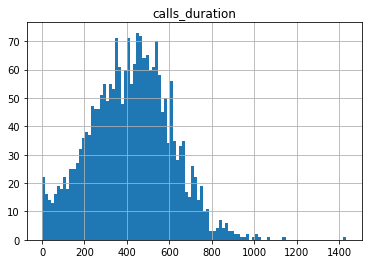

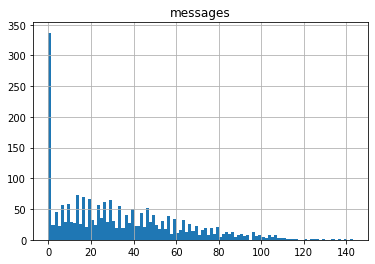

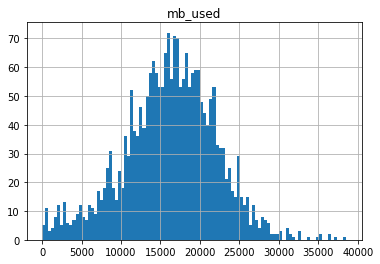

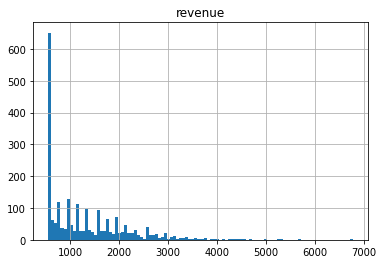

In [40]:
for param, name in parameters.items():
    smart_stat.hist(param, bins=100)

array([[<AxesSubplot:title={'center':'calls_duration'}>]], dtype=object)

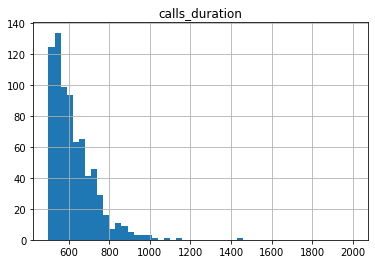

In [54]:
smart_stat.hist(param, bins=50, range=(500, 2000))

Видим, что в среднем пользователи тарифа "Смарт" тратят 418 минут из 500 доступных и 33 сообщения из 50 доступных, т.е. не превышают лимит (хотя и расходуют бОльшую часть). А вот интернет-трафика в среднем необходимо почти на 1 ГБ больше, чем предусмотрено тарифом (15.8 ГБ при лимите в 15 ГБ).

Из гистограмм видим, что очень часто пользователи вообще не используют сообщения (пик в районе 0): в целом, закономерно, когда есть большое количество различных мессенджеров. 

Распределения для минут разговора и интернет-трафика близки к нормальному распределению, а вот распределение числа сообщений больше похоже на распределение Пуассона.

Средняя выручка пользователя тарифа "Смарт" составляет 1290р., т.е. более чем в 2 раза превышает ежемесячную плату. Видим, что в большинстве случаев пользователи укладываются в лимиты по тарифу (пик в начале графика, в районе 550). Однако на гистограмме также видим слабовыраженные всплески, отстоящие друг от друга примерно на 200, что соответствует доплате за каждый лишний ГБ интернета.

### Тариф "Ультра"

Рассмотрим поведение клиентов тарифа "Ультра": сколько тратят минут разговора, сообщений, интернет-трафика.

In [39]:
for param, name in parameters.items():
    print(f'{name}:')
    print(f' Среднее:\t{ultra_stat[param].mean()}')
    var = np.var(ultra_stat[param])
    print(f' Дисперсия:\t{var}')
    print(f' СКО:\t\t{np.sqrt(var)}')
    print()

Продолжительность звонков:
 Среднее:	526.6233502538071
 Дисперсия:	100771.2236172022
 СКО:		317.44483554974113

Кол-во сообщений:
 Среднее:	49.36345177664975
 Дисперсия:	2282.9460753948824
 СКО:		47.78018496610161

Интернет-трафик:
 Среднее:	19469.308629441624
 Дисперсия:	101648256.8915499
 СКО:		10082.076020917017

Выручка:
 Среднее:	2070.1522842639592
 Дисперсия:	141373.07325620347
 СКО:		375.9961080333192



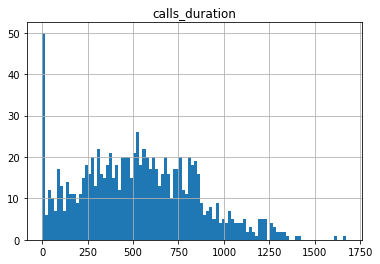

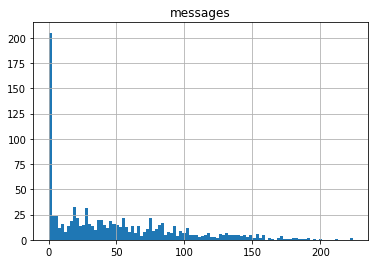

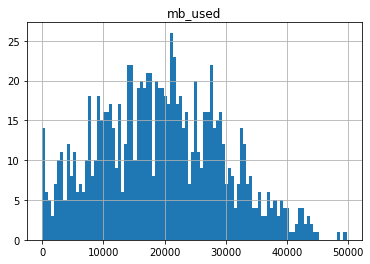

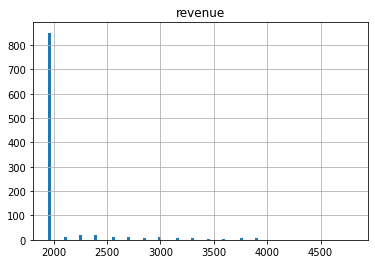

In [40]:
for param, name in parameters.items():
    ultra_stat.hist(param, bins=100)

Пользователи тарифа "Ультра" в среднем тратят всего 527 минут из 3000 доступных (меньше 20%). Редкие случаи использования намного бОльшего количества минут всё равно не дотягивают до лимита (всего около 1750 минут в месяц).

С сообщениями наблядается похожая картина: в среднем используется всего 49 сообщений из 1000 (около 5%).

А вот интернет-трафик пользователи тарифа "Ультра" в среднем почти веcь используют (19 Гб при лимите в 30 ГБ).

Средняя выручка пользователя тарифа "Ультра" составляет 2070р., т.е. немногим более ежемесячной платы по даному тарифу. Видим, что в большинстве случаев пользователи укладываются в лимиты по тарифу (пик в начале графика, в районе 1950), хотя и встречаются редкие случаи, когда пользователям приходится оплачивать услуги сверх тарифного плана (судя по гистограмме, это снова доплаты за интернет).

### Сравнение тарифов

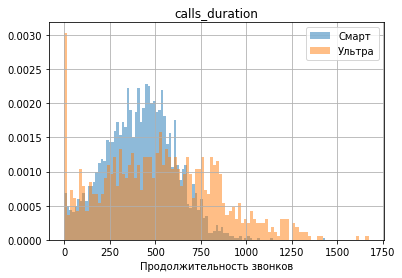

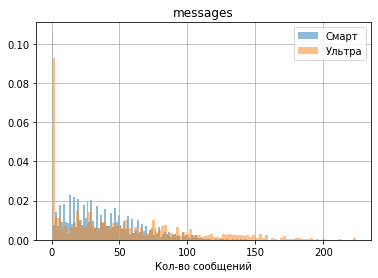

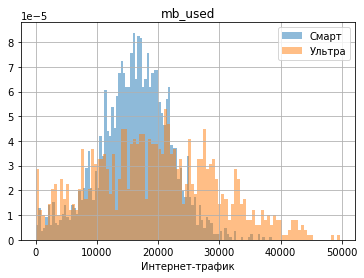

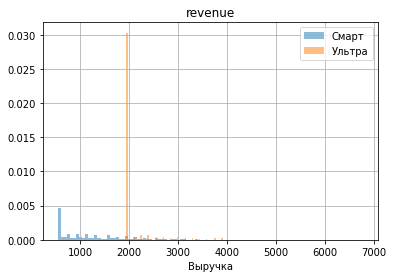

In [41]:
for param, name in parameters.items():
    ax = smart_stat.hist(param, bins=100, density=True,
                         alpha=0.5, label='Смарт')
    ultra_stat.hist(param, bins=100, density=True,
                    alpha=0.5, label='Ультра', ax=ax)
    plt.xlabel(name)
    plt.legend()

На гистограммах видно, что распределения для тарифов оказываются похожи, однако для тарифа "Ультра" наблюдаем более пологие графики. Так, например, если пользователи тарифа "Смарт" уже довольно редко используют больше 600 минут и 25 ГБ, то для пользователей тарифа "Ультра" довольно частыми оказываются значения вплоть до 1000 минут и 35 ГБ.

"Средние" пользователи тарифов

|Тариф |Минуты|Сообщения|Интернет|Выручка|
|------|------|---------|--------|-------|
|Смарт |   418|       33|      16|   1290|
|Ультра|   527|       49|      19|   2070|

Средний пользователь тарифа "Смарт" использует не много больше минут, сообщений и интернет-трафика чем средний пользователь "Ультра". Однако выручка пользователя тарифа "Ультра" почти на 800р. больше выручки пользователя тарифа "Смарт", т.е. "Ультра" в среднем оказывается прибыльнее для компании.

## Проверка гипотез

Перейдём к проверке гипотез:
 1. средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются;
 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Выручка разных тарифов

Необхоимо проверить предположение, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются. 

Сформулируем нулевую и альтернативну гипотезу следующим образом: 
 - нулевая гипотеза - средние выручки пользователей тарифов равны.
 - альтернативная гипотеза - средние выручки пользователей тарифов не равны.
 
Будем проверять гипотезу о равенстве среднего по выборкам.

In [42]:
smart_stat.shape[0]

2229

In [43]:
ultra_stat.shape[0]

985

Размеры выборок разные, поэтому при проведении теста в метод `ttest_ind` передадим параметр `equal_var=False`.

In [44]:
alpha = 0.01

results = st.ttest_ind(smart_stat['revenue'],
                       ultra_stat['revenue'],
                       equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value: 4.2606313931076085e-250
Отвергаем нулевую гипотезу.


По результатм тестов отвергаем нашу нулевую гипотезу. Значит, предположение, что выручки пользователей разных тарифов различаются, верно.

### Выручка в Москве и в других регионов

Необхоимо проверить предположение, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

Сформулируем нулевую и альтернативну гипотезу следующим образом: 
 - нулевая гипотеза - средние выручки пользователей из Москвы и из других регионов равны.
 - альтернативная гипотеза - средние выручки пользователей не равны.
 
Как и первом случае, будем проверять гипотезу о равенстве среднего по выборкам.

In [45]:
users_stat.query('city == "Москва"').shape[0]

611

In [46]:
users_stat.query('city != "Москва"').shape[0]

2603

Размеры выборок снова различны, поэтому при проведении теста в метод `ttest_ind` передадим параметр `equal_var=False`.

In [47]:
alpha = 0.01

results = st.ttest_ind(users_stat.query('city == "Москва"')['revenue'],
                       users_stat.query('city != "Москва"')['revenue'],
                       equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


Не получилось отвергнуть нашу нулевую гипотезу. Значит, средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны.

## Вывод

В ходе предобработки данных были внесены некоторые исправления (удалён лишний столбец из таблицы `internet`, округлены минуты разговора в соответствии с тарифом, изменён тип некоторых данных).

Для дальнейшего анализа была собрана общая таблица с необходимыми данными: для каждого пользователя по месяцам собрана информация о количестве звонков и израсходованных минут разговора, количестве сообщений, израсходованном интернет-трафике. По этим данным была расчитана выручка для каждого пользователя по месяцам.

Затем была проанализировано поведение пользователей каждого тарифа: сколько используют минут, сообщений, трафика:
 - пользователи тарифа "Смарт" в среднем расходуют бОльшую часть предоставленных минут разговора (418 из 500) и сообщений (33 из 50), а интернета в среднем им требуется почти на 1 ГБ больше (15.8 ГБ), чем входит в тариф (15 ГБ); средняя выручка составляет 1290р.;
 - пользователи тарифа "Ультра" расходуют всего около 20% минут (527 из 3000) и 5% сообщений (49 из 1000); в среднем у них остаются неизрасходнованными около 11 ГБ интернет-трафика; средняя выручка 2070р.
 
Наконец, были проверены две гипотезы. Было установлено следующее:

 1. Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается. Первая гипотеза подтвердилась.
 2. Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов оказалась равна. Таким образом, вторая гипотеза была не подствердилась.
 
Таким образом, независимо от региона тариф "Ультра" оказался прибыльнее тарифа "Смарт", что мы могли увидеть как по распределениям, так и путём проверки гипотез.